# Taller 02 cálculo de raices
##### Nombre: David Alejandro Díaz Pineda


## 1) Encuentre todas las raíces del polinomio 
$$x^4 + 540x^3 +109124x^2 + 9781632x + 328188672 = 0$$

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton, bisect

Para el método de Newton necesitamos tanto la función como su derivada

In [39]:
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672  

def fprime(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

Definimos estimaciones para encontrar hasta un máximo de 4 raíces e iteramos el método de newton con todas estas estimaciones para encontrar las raíces

In [45]:
raices_newton = []
estimaciones = [-200, -190, -180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0]
for valor in estimaciones:
    try:
        raiz_newton = newton(f, valor, fprime)
        raiz_newton = round(raiz_newton, 4)
        if raiz_newton not in raices_newton:
            raices_newton.append(raiz_newton)
            print(f'Raíz cerca de {valor}: {raiz_newton}')
            continue
    except RuntimeError:
        print(f'No se encontró raíz con Newton cerca de {valor}')
    

Raíz cerca de -200: -152.0
Raíz cerca de -140: -136.0
Raíz cerca de -130: -126.0


Para encontrar las raíces usando el método de la bisección, necesitamos identificar intervalos donde la función cambie de signo.

In [41]:
x = np.linspace(-200, 0, 1000)
cambios = []

for i in range(len(x)-1):
    if f(x[i]) * f(x[i+1]) < 0:
        cambios.append((round(x[i],4), round(x[i+1],4)))

print("Intervalos con cambio de signo:", cambios)

Intervalos con cambio de signo: [(np.float64(-152.1522), np.float64(-151.952)), (np.float64(-136.1361), np.float64(-135.9359))]


In [ ]:
raices_bisect = []
for a,b in cambios:
    raiz_bisect = bisect(f, a, b)
    raiz_bisect = round(raiz_bisect, 4)
    if raiz_bisect not in raices_bisect:
        raices_bisect.append(raiz_bisect)
        print(f'Raíz encontrada en el intervalo ({a}, {b}): {raiz_bisect}')

Raíz encontrada con bisección en el intervalo (-152.1522, -151.952): -152.0
Raíz encontrada con bisección en el intervalo (-136.1361, -135.9359): -136.0


Finalmente, graficando la función tenemos:

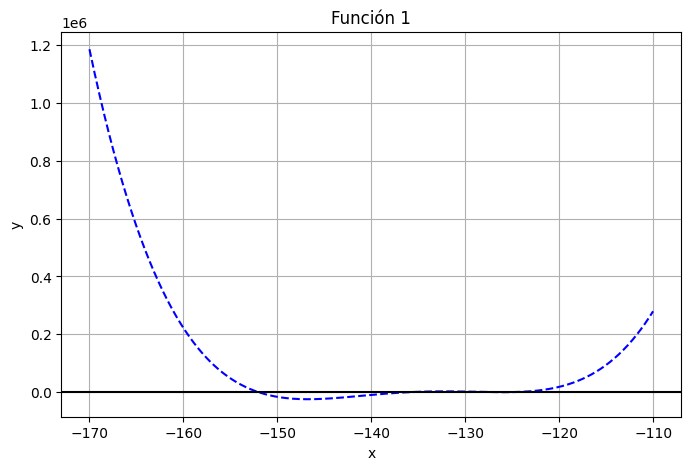

In [ ]:
x = np.linspace(-170, -110, 1000)
y = f(x)
plt.figure(figsize=(8,5))
plt.plot(x, y, color='blue', linestyle='--')
plt.title('Función 1')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.grid(True)
plt.show()

## 2) Encuentre todos los puntos en los que la curva $$(\frac{y}{2})^2 = (\frac{x+3}{2})^2 - 1$$ interseca el eje $y = -2$


Teniendo esta ecuación podemos reemplazar
$$(\frac{-2}{2})^2 = (\frac{x+3}{2})^2 - 1$$
$$-1^2 = (\frac{x+3}{2})^2 - 1$$
$$2 = (\frac{x+3}{2})^2 $$
$$8 = (x+3)^2 $$
$$(x+3)^2 - 8 $$

Con esta nueva función, al encontrar las raices nos dará los puntos en los que interseca al eje y en -2

In [47]:
import math

def g(x): return (x+3)**2 - 8
def dg(x): return 2*(x+3)

# Bisección (intervalos que aíslan las raíces)
def biseccion(f,a,b,tol=1e-12):
    if f(a)*f(b) > 0: raise ValueError("No hay cambio de signo")
    while (b-a)/2 > tol:
        c = (a+b)/2
        if f(c) == 0: return c
        if f(a)*f(c) < 0: b = c
        else: a = c
    return (a+b)/2

r1 = biseccion(g, -1, 0)    # cerca de -0.1716
r2 = biseccion(g, -6, -5)   # cerca de -5.8284
print(r1, r2)

-0.1715728752542418 -5.828427124745758
